In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
# print(alphas)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X,y)
scores = clf.cv_results_["mean_test_score"]
scores_st = clf.cv_results_["std_test_score"]



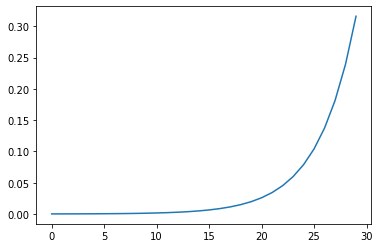

In [35]:
plt.plot(alphas)
plt.show()

(0.0001, 0.31622776601683794)

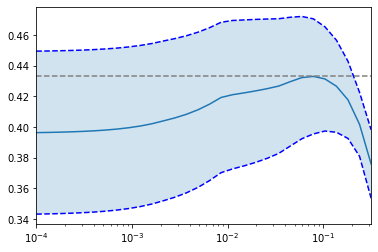

In [52]:
plt.semilogx(alphas, scores)

std_error = scores_st / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel("")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [80]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

for k, (train,test) in enumerate(k_fold.split(X,y)):
    lasso_cv.fit(X[train], y[train])
    print(
        "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
            k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
        )
    )

plt.show()


[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15521
[fold 2] alpha: 0.07880, score: 0.45192


In [83]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)